In [3]:
import json

with open('test_data.jsonl', 'r') as file:
    test_data = json.load(file)

gold_responses = [sample['output'] for sample in test_data]
print(len(gold_responses))

100


In [4]:
with open('gemma_responses.json', 'r') as file:
    gemma_responses = json.load(file)

print(len(gemma_responses))

with open('mistral_responses_token1k.json', 'r') as file:
    mistral_responses = json.load(file)
print(len(mistral_responses))

with open('llama2_responses_token1k.json', 'r') as file:
    llama2_responses = json.load(file)
print(len(llama2_responses))

with open('llama3_responses.json', 'r') as file:
    llama3_responses = json.load(file)
print(len(llama3_responses))


100
100
100
100


In [5]:
!pip install transformers

In [6]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manyli

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np




In [8]:
from bert_score import score



# Using BioBERT with BERTScore
def compute_bert_scrore(model_responses, gold_responses):
  P, R, F1 = score(model_responses, gold_responses, lang="en", verbose=True)
  return P, R, F1

In [9]:
gemma_P, gemma_R, gemma_F1 = compute_bert_scrore(gemma_responses, gold_responses)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 10.37 seconds, 9.64 sentences/sec


In [10]:
llama2_P, llama2_R, llama2_F1 = compute_bert_scrore(llama2_responses, gold_responses)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 7.65 seconds, 13.06 sentences/sec


In [11]:
llama3_P, llama3_R, llama3_F1 = compute_bert_scrore(llama3_responses, gold_responses)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 7.32 seconds, 13.66 sentences/sec


In [12]:
mistral_P, mistral_R, mistral_F1 = compute_bert_scrore(mistral_responses, gold_responses)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 7.63 seconds, 13.11 sentences/sec


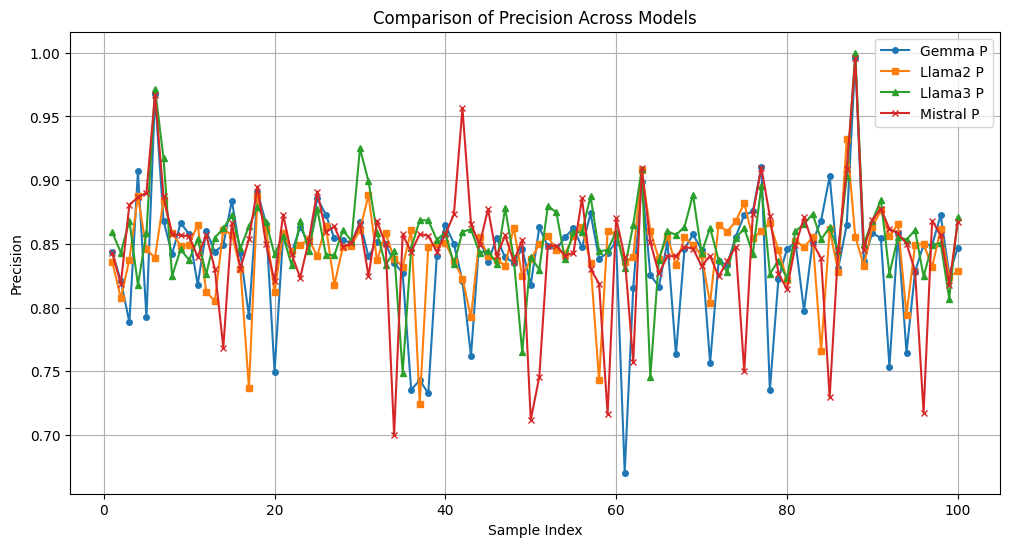

In [13]:
import matplotlib.pyplot as plt


index = range(1, len(gemma_P) + 1)

plt.figure(figsize=(12, 6))

# Plotting each precision data set
plt.plot(index, gemma_P, label='Gemma P', marker='o', linestyle='-', markersize=4)
plt.plot(index, llama2_P, label='Llama2 P', marker='s', linestyle='-', markersize=4)
plt.plot(index, llama3_P, label='Llama3 P', marker='^', linestyle='-', markersize=4)
plt.plot(index, mistral_P, label='Mistral P', marker='x', linestyle='-', markersize=4)

plt.xlabel('Sample Index')
plt.ylabel('Precision')
plt.title('Comparison of Precision Across Models')
plt.legend()
plt.grid(True)
plt.show()

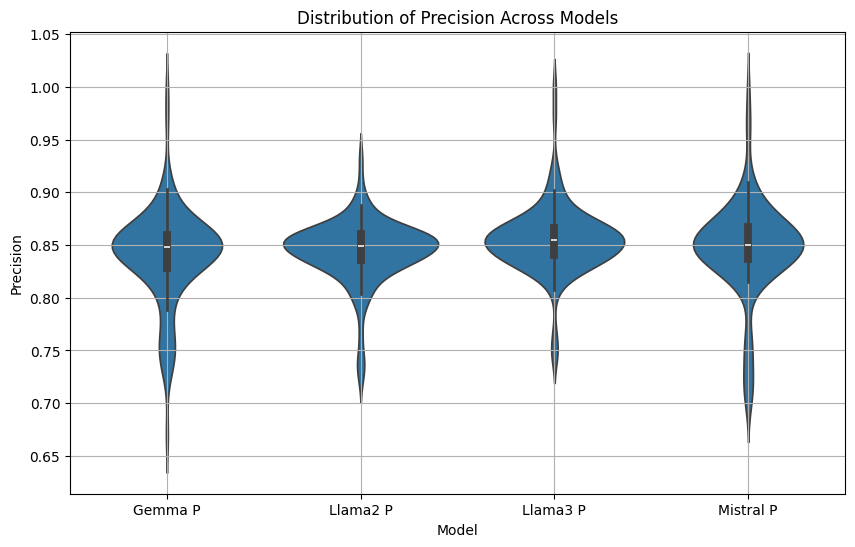

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Gemma P': gemma_P,
    'Llama2 P': llama2_P,
    'Llama3 P': llama3_P,
    'Mistral P': mistral_P
}
df = pd.DataFrame(data)

df_melted = df.melt(var_name='Model', value_name='Precision')

# Creating the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='Precision', data=df_melted)

plt.title('Distribution of Precision Across Models')
plt.ylabel('Precision')
plt.xlabel('Model')
plt.grid(True)
plt.show()


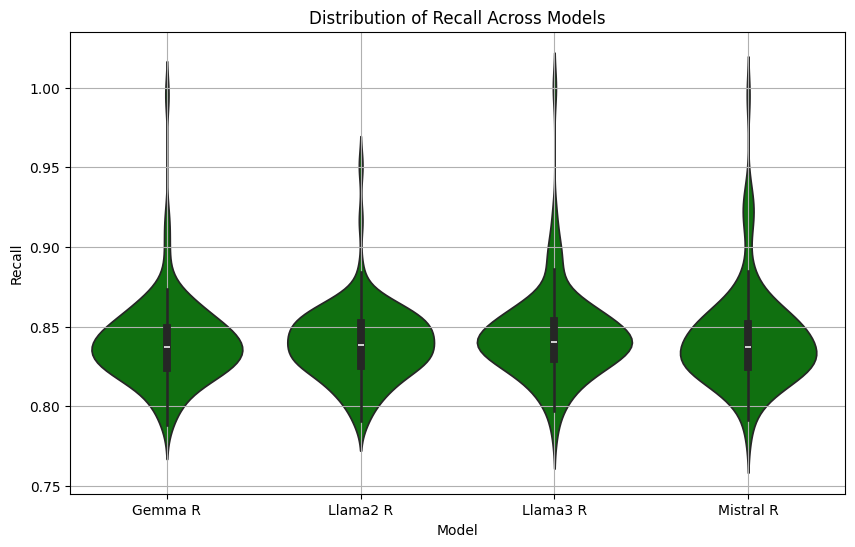

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Gemma R': gemma_R,
    'Llama2 R': llama2_R,
    'Llama3 R': llama3_R,
    'Mistral R': mistral_R
}
df = pd.DataFrame(data)

df_melted = df.melt(var_name='Model', value_name='Recall')

# Creating the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='Recall', data=df_melted, color = 'green')

plt.title('Distribution of Recall Across Models')
plt.ylabel('Recall')
plt.xlabel('Model')
plt.grid(True)
plt.show()


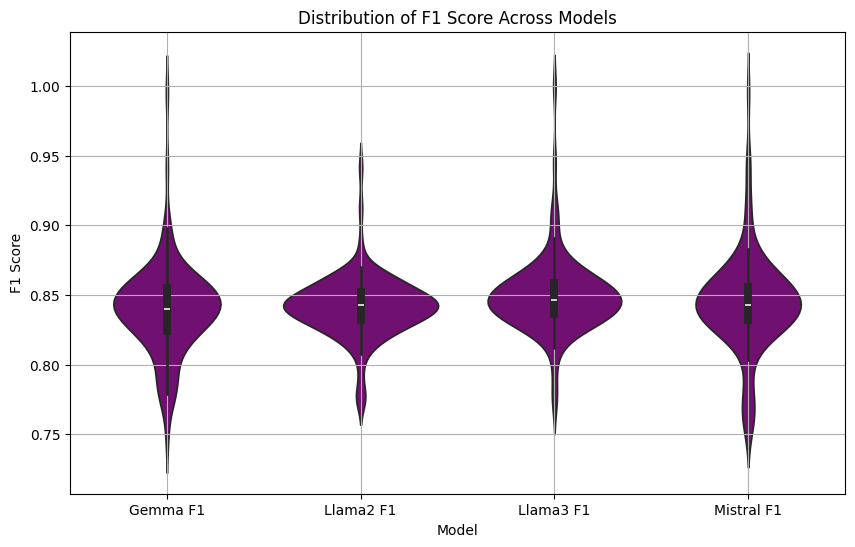

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    'Gemma F1': gemma_F1,
    'Llama2 F1': llama2_F1,
    'Llama3 F1': llama3_F1,
    'Mistral F1': mistral_F1
}
df = pd.DataFrame(data)

df_melted = df.melt(var_name='Model', value_name='F1 Score')

# Creating the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='F1 Score', data=df_melted, color = 'purple')

plt.title('Distribution of F1 Score Across Models')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()


In [18]:
!pip install seaborn

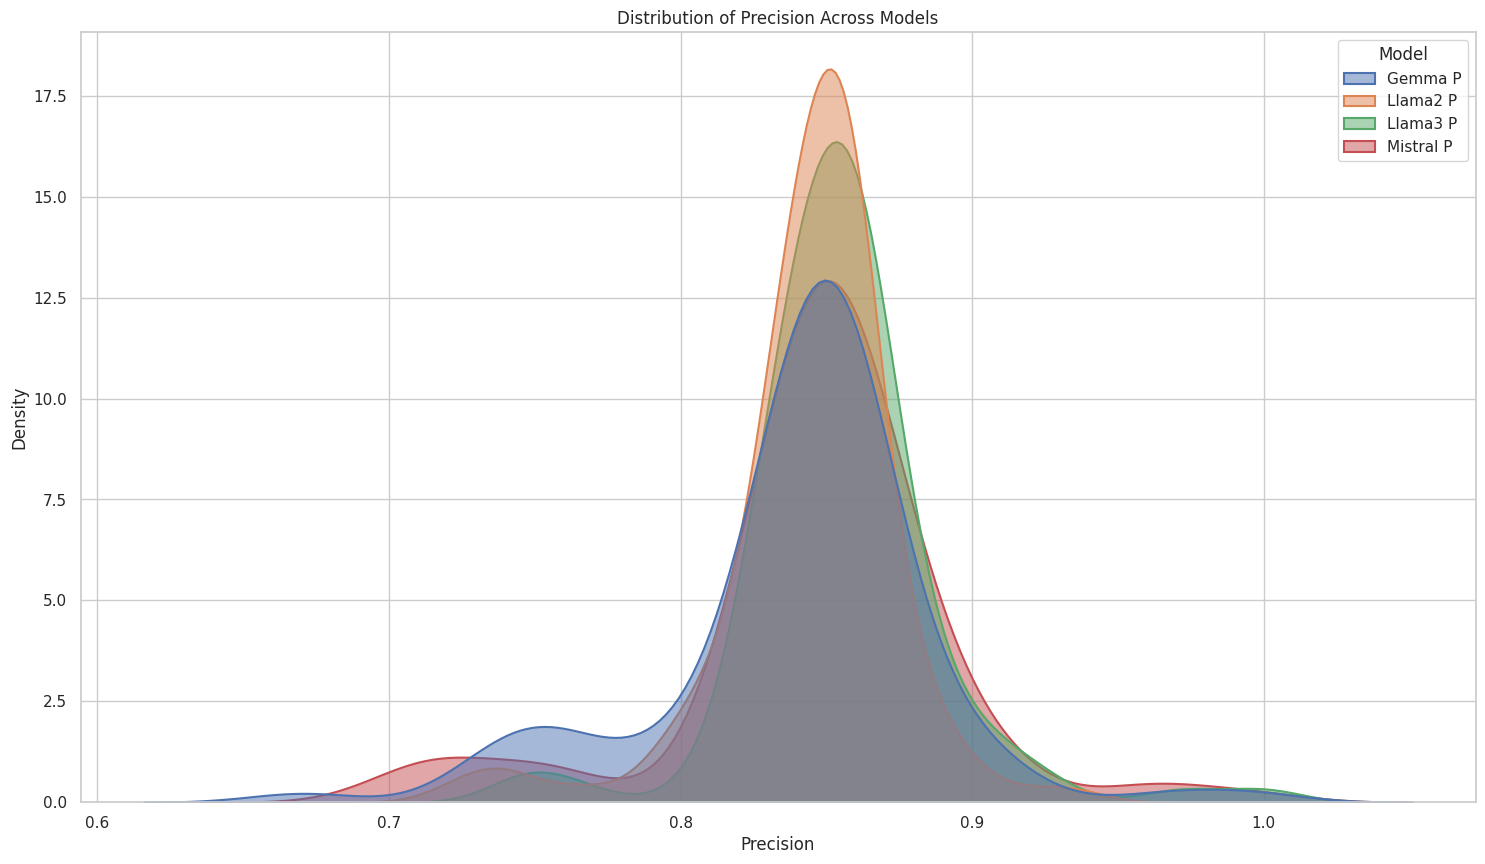

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'Gemma P': gemma_P,
    'Llama2 P': llama2_P,
    'Llama3 P': llama3_P,
    'Mistral P': mistral_P
}

df = pd.DataFrame(data)

df_melted = df.melt(var_name='Model', value_name='Precision')

sns.set(style="whitegrid")

# Creating the KDE plot
plt.figure(figsize=(18, 10))
sns.kdeplot(data=df_melted, x='Precision', hue='Model', fill=True, common_norm=False, alpha=0.5, linewidth=1.5)

plt.title('Distribution of Precision Across Models')
plt.xlabel('Precision')
plt.ylabel('Density')
plt.show()
